<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


### Task 2: Generate Descriptive Statistics and Visualizations

#### For the "Median value of owner-occupied homes" provide a boxplot

Text(0, 0.5, 'Median value of ownner-occupied homes (MEDV)')

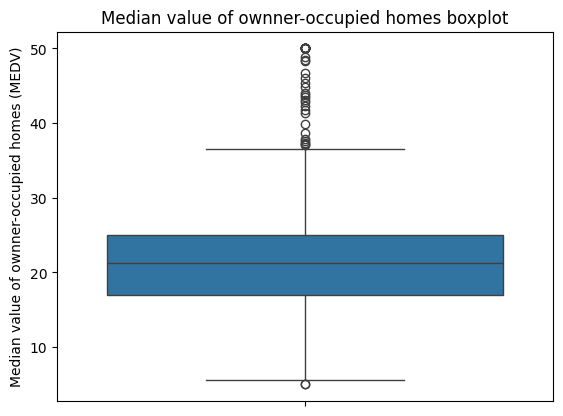

In [7]:
# Creating a Box Plot for the Median value of owner-occupied homes
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title("Median value of ownner-occupied homes boxplot")
ax.set_ylabel('Median value of ownner-occupied homes (MEDV)')

##### ***Findings:***
The boxplot shows that **median home values** are around **\\$21,000–\\$22,000**, with most values between **\\$17,000 and \\$25,000**. There are numerous **high-value outliers** (up to \\$50,000), and a single low-value outlier around \\$5,000.

#### Provide a bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles River distribution bar plot')

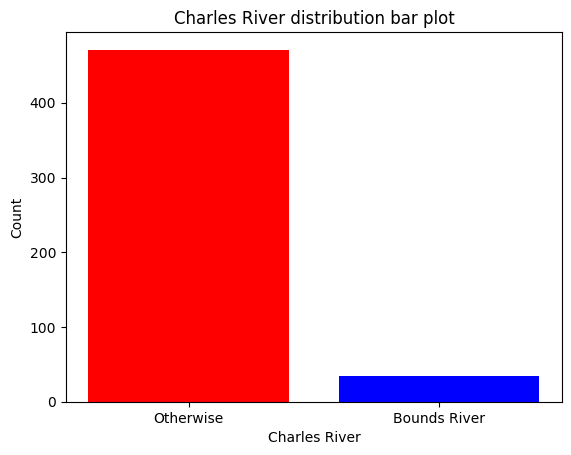

In [8]:
# Creating a bar plot for the Charles river variable
pyplot.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(sort=False),color=['red','blue'])
pyplot.xticks(boston_df.CHAS.unique(), ['Otherwise', 'Bounds River'])
pyplot.xlabel('Charles River')
pyplot.ylabel('Count')
pyplot.title('Charles River distribution bar plot')

##### ***Findings:***
The vast majority of houses do not border the Charles River

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0, 0.5, 'Median value of ownner-occupied homes (MEDV)')

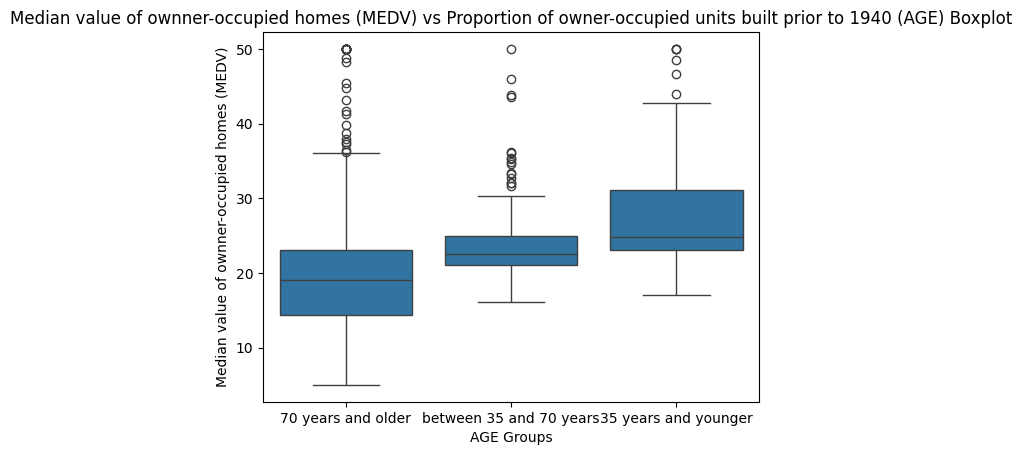

In [9]:
# Discretizing the age variable into three groups
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'AGE_GROUP'] = '70 years and older'

# Creating a box plot for Median Value MEDV differentiated by AGE groups created above
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
ax.set_title('Median value of ownner-occupied homes (MEDV) vs Proportion of owner-occupied units built prior to 1940 (AGE) Boxplot')
ax.set_xlabel('AGE Groups')
ax.set_ylabel('Median value of ownner-occupied homes (MEDV)')

##### ***Findings:***
The boxplot shows that **median home values** are lower in older houses and increase as the age of the houses decreases.
There are numerous **high-value outliers** in the groups of houses between 35 and 70 years and older then 70 years.

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'Nitric oxide concentrations (NOX)')

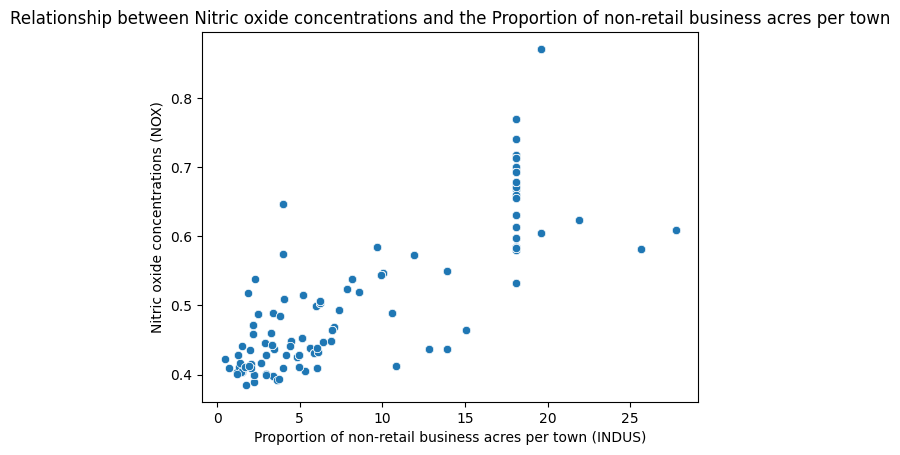

In [10]:
# Creating a scatter plot with the variables NOX and INDUS
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Relationship between Nitric oxide concentrations and the Proportion of non-retail business acres per town')
ax.set_xlabel('Proportion of non-retail business acres per town (INDUS)')
ax.set_ylabel('Nitric oxide concentrations (NOX)')

##### ***Findings:***
As the proportion of non-retail business acres per town goes up, the Nitric oxide concentrations also goes up indicating that there is a positive relationship between both variables

#### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 9.444444444444438, 'Pupil to Teacher Ratio (PTRATIO)')

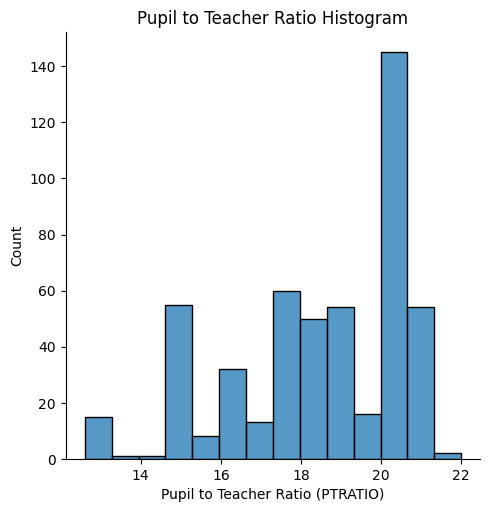

In [11]:
# Creating a histogram for the PTRATIO variable and setting de kde = false because we don't need the curve
ax = sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.title('Pupil to Teacher Ratio Histogram')
pyplot.xlabel('Pupil to Teacher Ratio (PTRATIO)')

##### ***Findings:***
The histogram of the pupil to teacher ratio variable shows a skewed distribution, with most schools having a ratio around 20. However, there's a significant variation, suggesting inequality in class sizes.

### Task 3: Use the appropriate tests to answer the questions provided.

#### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? 

State the hypothesis

* H0 (Null Hypothesis): There is no significant difference in median value of houses bounded by Charles river
* H1 (Alternative Hypothesis): There is a significant difference in median value of houses bounded by Charles river

Use α = 0.05

We can use the Levene’s Test in Python to check test significance

In [12]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'],center='mean')
# if the p-value is greater than 0.05 we assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In this case, the p-value is less then 0.05, so we assume that the variance are not equal

We now run the T-test and set the equal_var to False

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

##### ***Conclusion:***
Since the **p-value is less than the alpha value 0.05**, we **reject the null hypothesis** as there is enought evidence that there is a significant difference in median value of houses bounded by Charles River

#### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

State the hypothesis

* H0 (Null Hypothesis): There is no difference in median value of houses for each proportion of owner occupied units built prior to 1940.
* H1 (Alternative Hypothesis): There is a difference in MEDV for at least one of the AGE Group.

Use α = 0.05

We can use the Levene’s Test in Python to check test significance

In [15]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], center='mean')
# if the p-value is greater than 0.05 we assume equality of variance

LeveneResult(statistic=2.5062577818017884, pvalue=0.0825911787428735)

Since the p-value is grater than 0.05, we assume equality of variance

Now, we separate each of the three sample into a variable

In [17]:
thirtyfive_younger = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

And then we run a one-way ANOVA

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger,thirtyfive_seventy,seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 29.028583208977576, P-Value: 1.1723548056383608e-12


Since the **p-value is less then the alpha value 0.05**, we **reject the null hypothesis** as there is significant evidence of difference in median value of houses (MEDV) for at least one group of proportion of owner occupied units built prior to 1940 (AGE).

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis

* H0 (Null Hypothesis): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* H1 (Alternative Hypothesis): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Use α = 0.05

In [19]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

As we could see in the [scatter plot of the previous task](#Provide-a-scatter-plot-to-show-the-relationship-between-Nitric-oxide-concentrations-and-the-proportion-of-non-retail-business-acres-per-town.-What-can-you-say-about-the-relationship?) , the **correlation coeficient near 1 indicates a strong positive correlation** and since the **p-value (Sig. (2-tailed)) is less than the alpha value 0.05**, we **reject the null hypothesis** and we conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### 4.	What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 

State the hypothesis

* H0 (Null Hypothesis): There is no relationship between a weighted distance to the five Boston employment centres on the median value of owner occupied homes.
* H1 (Alternative Hypothesis): There is a relationship between a weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Use α = 0.05

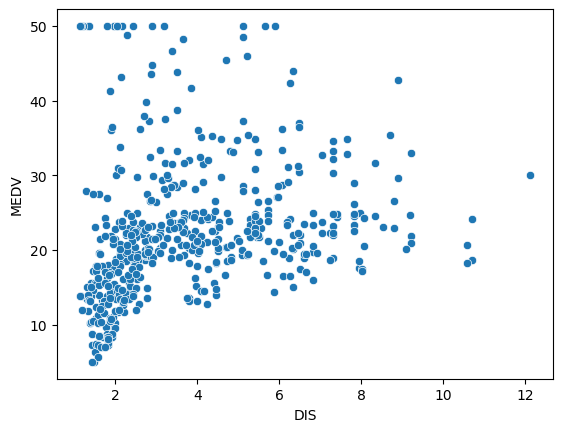

In [20]:
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)

In [21]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        20:41:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The **Pearson R - Correlation Coeficient R is 0.25 and coef is positive indicating a weak positive correlation** and since the **p-value (Sig. (2-tailed)) is less than the alpha value 0.05**, we **reject the null hypothesis** and we conclude that there is a relationship between a weighted distance to the five Boston employment centres on the median value of owner occupied homes.